##Analysis

Based on the data we can see that the drug regimen's Capomulin and Ramicane provide the lowest numbers across the tumor volume categories. We can also see that all the other drugs roughly all bring back similar results. My box plot data may be wrong, but based on the data I came up with the same 2 drug regimens that brought back the best scores appear to contain outliers. I can only assume that they have outliers based on how far their numbers were from every other drug regimen wwould produce some results far from the mean. 



In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from pathlib import Path
import numpy as np

# Study data files
mouse_metadata_path = "../matplotlib-challenge/data/Mouse_metadata.csv"
study_results_path = "../matplotlib-challenge/data/Study_results.csv"

#Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results,
                                 how='outer', on='Mouse ID')

#Display the data table for preview
combined_df.head()

#Checking the number of mice.
combined_df.value_counts('Mouse ID')

Mouse ID
g989    13
a203    10
n364    10
m546    10
m550    10
        ..
x226     1
b447     1
f932     1
l872     1
n482     1
Length: 249, dtype: int64

In [2]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combined_df2 = combined_df.loc[combined_df.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()

In [3]:
# Optional: Get all the data for the duplicate mouse ID.

# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleandf = combined_df[combined_df['Mouse ID'] != 'g989'] 

#print(cleandf.describe())

mice_count1 = len(cleandf['Mouse ID'].unique())
print(mice_count1)

248


In [4]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.




In [5]:
# Group by 'Drug Regimen'
df1 = combined_df.groupby(['Drug Regimen'])

# Calculate summary statistics
tumor_mean = round(df1['Tumor Volume (mm3)'].mean(), 1)
tumor_median = round(df1['Tumor Volume (mm3)'].median(), 1)
tumor_stdev = df1['Tumor Volume (mm3)'].std()
tumor_var = df1['Tumor Volume (mm3)'].var()
tumor_sem = df1['Tumor Volume (mm3)'].sem()

# Create dataframe with summary statistics
df2 = pd.DataFrame({'Drug Regimen': tumor_mean.index,
                    'Mean Tumor Vol' : tumor_mean.values,
                    'Median Tumor Vol' : tumor_median.values,
                    'Tumor Variance' : tumor_var.values,
                    'Tumor Vol Std Dev.' : tumor_stdev.values,
                    'Tumor Vol Std Err' : tumor_sem.values})

# Flatten the column index of df1 before merging
df1_summary = df1.agg({'Tumor Volume (mm3)': ['min', 'max', 'mean', 'median', 'std']})
df1_summary.columns = df1_summary.columns.map('_'.join)

# Merge df1_summary and df2
summary = df1_summary.merge(df2, on='Drug Regimen')

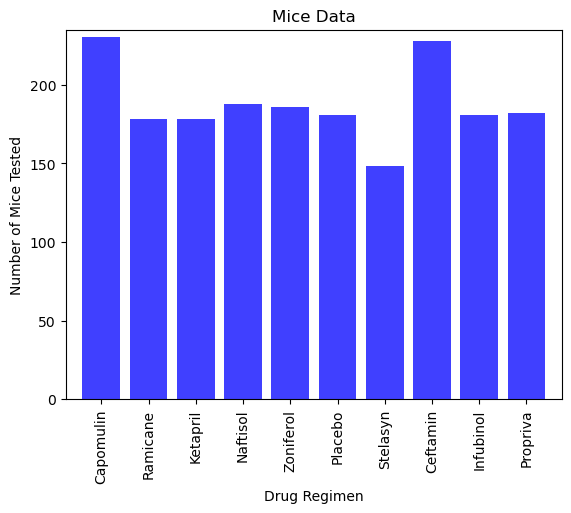

In [6]:
drugs = ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", "Placebo", "Stelasyn", "Ceftamin", "Infubinol", "Propriva"]
tested = cleandf.groupby(['Drug Regimen']).count()['Timepoint']

x_axis = np.arange(0, len(drugs))
tick_locations = x_axis

plt.title("Mice Data")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

plt.xlim(-0.75, len(drugs)-.25)
plt.ylim(0, max(tested) + 5)

plt.bar(x_axis, tested, facecolor="blue", alpha=0.75, align="center")
plt.xticks(tick_locations, drugs, rotation=90)
plt.show()


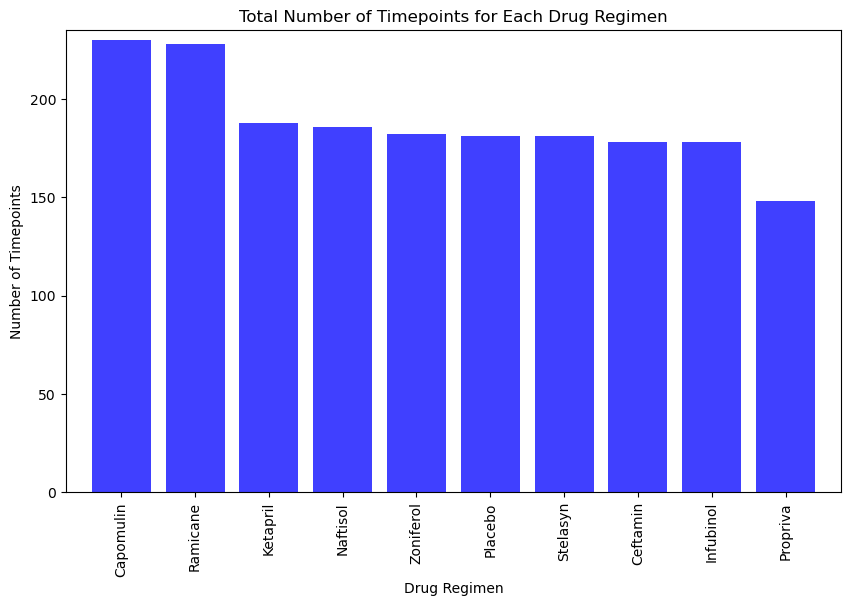

In [7]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

import numpy as np
import matplotlib.pyplot as plt

drugs = ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", "Placebo", "Stelasyn", "Ceftamin", "Infubinol", "Propriva"]
mice_count1 = cleandf["Drug Regimen"].value_counts().tolist()

x_axis = np.arange(0, len(mice_count1))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

plt.figure(figsize=(10, 6))
plt.bar(x_axis, mice_count1, color="blue", alpha=0.75, align="center")
plt.xticks(tick_locations, drugs, rotation=90)

plt.title("Total Number of Timepoints for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")

plt.xlim(-0.75, len(drugs)-.25)
plt.ylim(0, max(mice_count1) + 5)

plt.show()


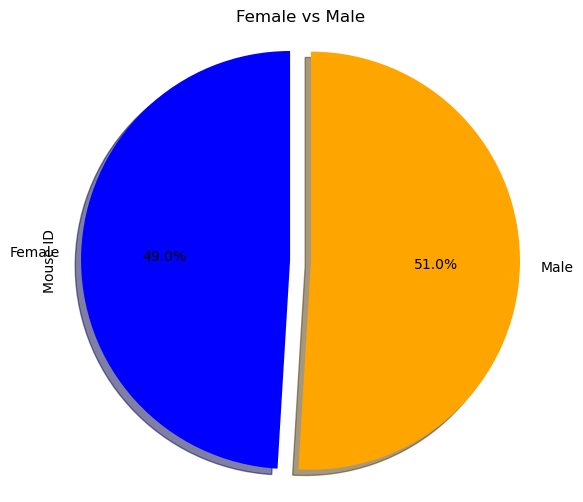

In [8]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Group the data by gender and sum the counts
mice_count = cleandf.groupby('Sex')['Mouse ID'].count()

# Define colors and explode
colors = ['blue', 'orange']
explode = (0, 0.1)

# Generate the pie plot
mice_count.plot(kind='pie', figsize=(6,6), colors=colors, explode=explode,
                 autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("Female vs Male")
plt.axis("equal")
plt.show()


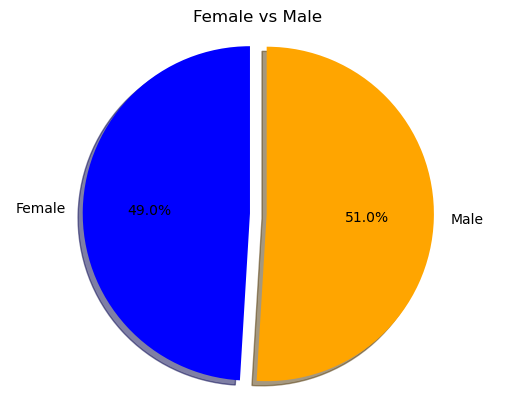

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Group the data by gender and sum the counts
mice_count = cleandf.groupby('Sex')['Mouse ID'].count()

# Define colors and explode
colors = ['blue', 'orange']
explode = (0, 0.1)

# Generate the pie plot
plt.title("Female vs Male")
plt.pie(mice_count, explode=explode, labels=mice_count.index, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.show()

In [10]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Define the four treatment regimens
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Filter the dataframe to only include the four treatment regimens
filtered_df = cleandf[cleandf['Drug Regimen'].isin(treatment_regimens)]

# Group the filtered dataframe by mouse ID and get the maximum timepoint for each mouse
last_timepoint = filtered_df.groupby('Mouse ID')['Timepoint'].max()

# Merge the filtered dataframe with the last timepoint dataframe to get the tumor volume at the last timepoint for each mouse
final_tumor_volume = pd.merge(filtered_df, last_timepoint, on=['Mouse ID', 'Timepoint'])

# Count the number of unique drug regimens using value_counts() and output the result
print(final_tumor_volume['Drug Regimen'].value_counts())

Ramicane     25
Capomulin    25
Infubinol    25
Ceftamin     25
Name: Drug Regimen, dtype: int64


In [11]:
# Put treatments into a list for for loop
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data 
tumor_vol_data = []

# Loop through each treatment
for treatment in treatments:
    # Select the rows that correspond to the current treatment and store the tumor volume data in a list
    current_treatment_data = cleandf.loc[cleandf['Drug Regimen'] == treatment, 'Tumor Volume (mm3)'].to_list()
    # Append the tumor volume data for the current treatment to the tumor_vol_data list
    tumor_vol_data.append(current_treatment_data)
    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = pd.Series(dtype='float')

    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles[0.25] = np.percentile(current_treatment_data, 25)
    quartiles[0.50] = np.percentile(current_treatment_data, 50)
    quartiles[0.75] = np.percentile(current_treatment_data, 75)
    
    iqr = np.percentile(current_treatment_data, 75) - np.percentile(current_treatment_data, 25)
    upper_bound = np.percentile(current_treatment_data, 75) + 1.5 * iqr
    lower_bound = np.percentile(current_treatment_data, 25) - 1.5 * iqr

    
    # Determine outliers
    outliers = [x for x in current_treatment_data if x < lower_bound or x > upper_bound]
    print(f"For {treatment}, values below {lower_bound} or above {upper_bound} could be outliers: {outliers}")


For Capomulin, values below 26.714832162499995 or above 55.9711007025 could be outliers: [25.47214326, 23.34359787]
For Ramicane, values below 24.1865864625 or above 57.488048122500004 could be outliers: [22.05012627]
For Infubinol, values below 32.309217298749985 or above 72.31757996875001 could be outliers: []
For Ceftamin, values below 32.81891142624998 or above 71.19095325625001 could be outliers: []


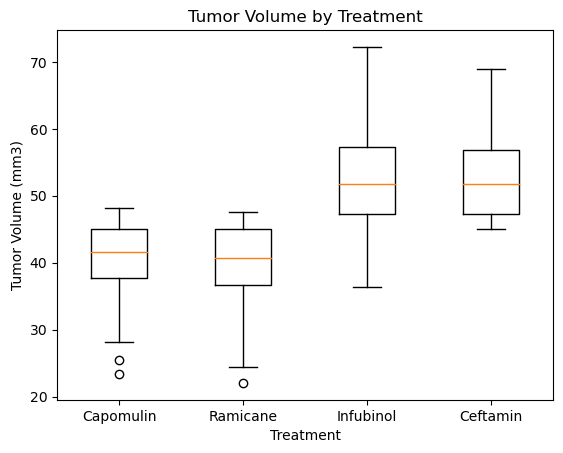

In [12]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data, labels=treatments)
plt.title('Tumor Volume by Treatment')
plt.xlabel('Treatment')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

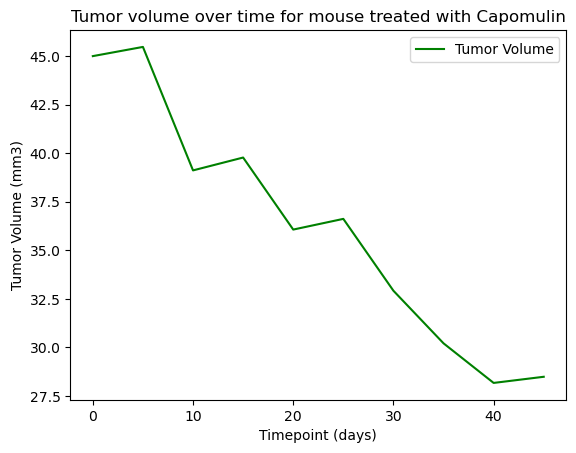

In [13]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Create the X and Y axis lists

# # Create the X and Y axis lists
time = np.arange(0, 50, 5)
capomulin_df = cleandf[(cleandf['Drug Regimen'] == 'Capomulin') & (cleandf['Mouse ID'] == 'x401')]
tumor_vol = capomulin_df['Tumor Volume (mm3)']

# Plot the charts and apply some styling
plt.plot(time, tumor_vol, color="green", label="Tumor Volume")

# Add labels to X and Y axes :: Add title
plt.title("Tumor volume over time for mouse treated with Capomulin")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.legend()

plt.show()


The correlation between mouse weight and average tumor volume is 0.84


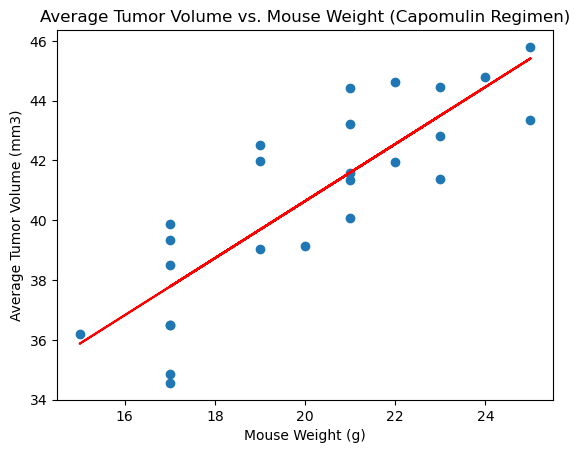

In [14]:
# Filter the data to only include Capomulin regimen
capomulin_data = cleandf.loc[cleandf["Drug Regimen"] == "Capomulin"]

# Calculate the average tumor volume for each mouse
avg_tumor_vol = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mouse_weight = capomulin_data.groupby("Mouse ID")["Weight (g)"].mean()

# Create scatterplot 
plt.scatter(mouse_weight, avg_tumor_vol)
plt.title("Average Tumor Volume vs. Mouse Weight (Capomulin Regimen)")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Calculate the correlation coefficient and linear regression model 
correlation = st.pearsonr(mouse_weight, avg_tumor_vol)
slope, intercept, rvalue, pvalue, stderr = st.linregress(mouse_weight, avg_tumor_vol)
regress_values = mouse_weight * slope + intercept
plt.plot(mouse_weight, regress_values, color='red')

print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}")
